In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
wine_df= pd.read_csv('wine_data.csv')
wine_df

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


### 와인 데이터 시각화

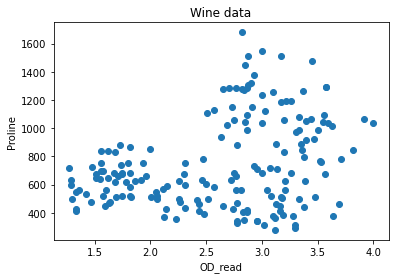

In [4]:
plt.scatter(wine_df.values[:, 0], wine_df.values[:, 1])
plt.title('Wine data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### K-Means

In [5]:
km= KMeans(3)
km_clusters= km.fit_predict(wine_df)

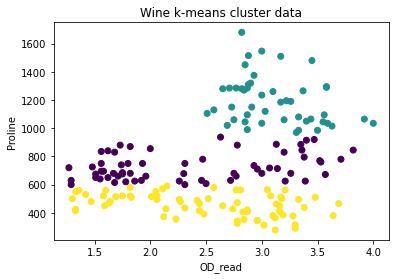

In [6]:
plt.scatter(wine_df.values[:, 0], wine_df.values[:, 1], c= km_clusters)
plt.title('Wine k-means cluster data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### 계층적 군집 분석

In [7]:
ac= AgglomerativeClustering(3, linkage= 'ward')
ac_clusters= ac.fit_predict(wine_df)

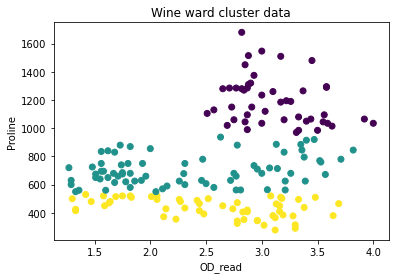

In [8]:
plt.scatter(wine_df.values[:, 0], wine_df.values[:, 1], c= ac_clusters)
plt.title('Wine ward cluster data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### silhouette_score를 사용하여 두 군집 분석 비교

In [9]:
print('Shilhouette score\n')
print('k-means: ', silhouette_score(wine_df, km_clusters))
print('ward: ', silhouette_score(wine_df, ac_clusters))

Shilhouette score

k-means:  0.5809421087616886
ward:  0.5651908644787632


#### 실루엣 점수
- 1에서 -1까지 점수가 나옴
- 클러스터를 완벽하게 분류했을 때: 1, 클러스터가 별로일 때: 낮은 값
- 얼마나 클러스터가 잘 군집이 형성 됐는지 수치로 나타내주는 지표

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

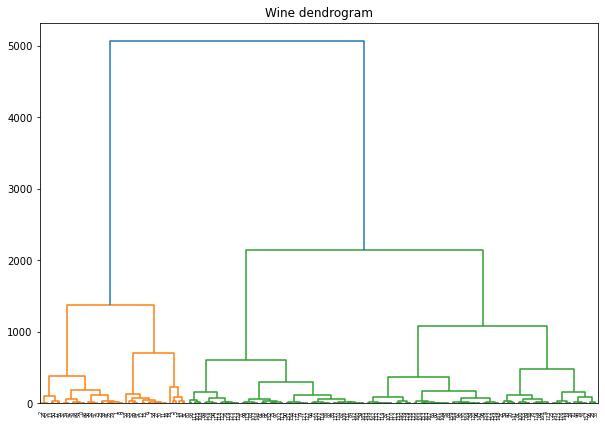

In [11]:
plt.figure(figsize= (10, 7))
plt.title('Wine dendrogram')
d= dendrogram(linkage(wine_df, method= 'ward'))

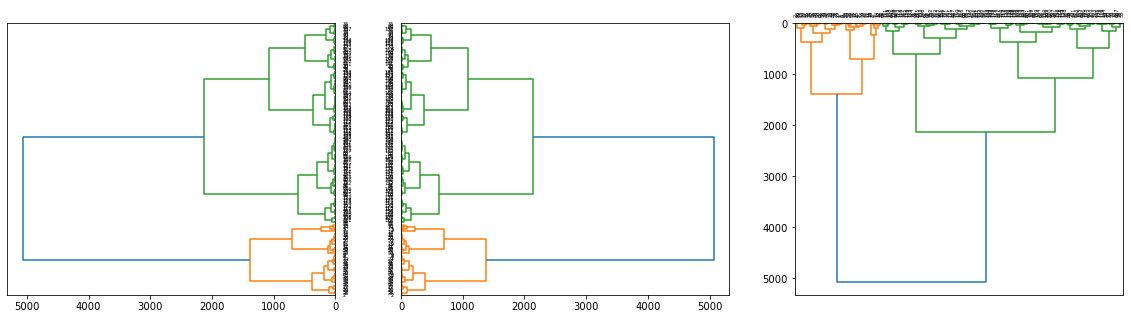

In [12]:
fig= plt.figure(figsize= (20, 5))

ax1= fig.add_subplot(1, 3, 1)
d1= dendrogram(linkage(wine_df, method= 'ward'),orientation= 'left')

ax2= fig.add_subplot(1, 3, 2)
d2= dendrogram(linkage(wine_df, method= 'ward'),orientation= 'right')

ax3= fig.add_subplot(1, 3, 3)
d3= dendrogram(linkage(wine_df, method= 'ward'),orientation= 'bottom')